#####  Corona vaccine progress 
version 0.87 created by Magnus Sälgö [twitter](https://twitter.com/salgo60), [Linked in](https://www.linkedin.com/in/magnus-s%C3%A4lg%C3%B6-148890/)

* [this Notebook](https://github.com/salgo60/CoronaVaccinationCheck/blob/master/Check%20Corona%20Vaccination.ipynb) / [repository](https://github.com/salgo60/CoronaVaccinationCheck) 

* read the data from [github.com/owid/covid-19-data...vaccinations/country_data](https://github.com/owid/covid-19-data/tree/master/public/data/vaccinations/country_data) and Wikidata
  * Data is reported cummulated for United Kingdom but also subnational data England, Scotland, Northern Ireland, Wales see [issue 228](https://github.com/owid/covid-19-data/issues/228)
     * subnational data have been published quite irregularly so far ==> we filter them out

In [1]:
from datetime import datetime
start_time  = datetime.now()
print("Last run: ", start_time)

Last run:  2021-01-01 00:17:56.855755


In [2]:
import pandas as pd
GITHUB_directory = "https://api.github.com/repos/owid/covid-19-data/contents/public/data/vaccinations/country_data"  
countries = pd.read_json(GITHUB_directory)  
listcountries = []
for index,row in countries.iterrows():
    df = pd.read_csv(row["download_url"])
    listcountries.append(df)
    
allCountriesGitHub = pd.concat(listcountries, axis=0, ignore_index=True)    

In [3]:
GITHUB_location_csv = "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/locations.csv"  
countries_csv = pd.read_csv(GITHUB_location_csv)  


In [4]:
countries_csv

,location,iso_code,source_name,source_website,vaccines,last_observation_date
0,Argentina,ARG,Government of Argentina,https://www.argentina.gob.ar/noticias/ministro...,Sputnik V,2020-12-29
1,Austria,AUT,Federal Ministry for Social Affairs and Health,https://www.sozialministerium.at/Informationen...,Pfizer/BioNTech,2020-12-30
2,Bahrain,BHR,Ministry of Health,https://twitter.com/MOH_Bahrain,Sinopharm,2020-12-30
3,Bulgaria,BGR,Ministry of Health,https://coronavirus.bg/bg/statistika,Pfizer/BioNTech,2020-12-30
4,Canada,CAN,COVID-19 Canada Open Data Working Group,https://github.com/ishaberry/Covid19Canada,Pfizer/BioNTech,2020-12-30
5,Chile,CHL,Department of Statistics and Health Information,https://deis.minsal.cl/,Pfizer/BioNTech,2020-12-27
6,China,CHN,National Health Commission,https://www.globaltimes.cn/page/202012/1211515...,"CNBG, Sinovac",2020-12-31
7,Costa Rica,CRI,Government of Costa Rica,https://www.presidencia.go.cr/comunicados/2020...,Pfizer/BioNTech,2020-12-24
8,Croatia,HRV,Ministry of Health,https://vlada.gov.hr/news/government-approves-...,Pfizer/BioNTech,2020-12-30
9,Denmark,DNK,Statens Serum Institut,https://covid19.ssi.dk/overvagningsdata/vaccin...,Pfizer/BioNTech,2020-12-31


In [5]:
# merge allCountriesGitHub with all Countries_csv
allCountries = pd.merge(allCountriesGitHub,countries_csv,how='outer',on="location",indicator=True)
# Show 15 latest sorted by dates
allCountries.sort_values(by=['date'],ascending=False)[0:15]

,location,date,vaccine,total_vaccinations,source_url,iso_code,source_name,source_website,vaccines,last_observation_date,_merge
48,Finland,2020-12-31,Pfizer/BioNTech,1767,https://thl.fi/fi/web/infektiotaudit-ja-rokotu...,FIN,Department of Health and Welfare,https://thl.fi/fi/web/infektiotaudit-ja-rokotu...,Pfizer/BioNTech,2020-12-31,both
34,China,2020-12-31,"CNBG, Sinovac",4500000,https://www.globaltimes.cn/page/202012/1211515...,CHN,National Health Commission,https://www.globaltimes.cn/page/202012/1211515...,"CNBG, Sinovac",2020-12-31,both
58,Hungary,2020-12-31,Pfizer/BioNTech,5110,https://hungarytoday.hu/chief-medical-officer-...,HUN,Government of Hungary,https://hungarytoday.hu/chief-medical-officer-...,Pfizer/BioNTech,2020-12-31,both
88,Oman,2020-12-31,Pfizer/BioNTech,5043,https://twitter.com/OmaniMOH/status/1344586383...,OMN,Ministry of Health,https://twitter.com/OmaniMOH/status/1344586383...,Pfizer/BioNTech,2020-12-31,both
47,Estonia,2020-12-31,Pfizer/BioNTech,1907,https://www.terviseamet.ee/et/uudised/covid-19...,EST,National Health Board,https://www.terviseamet.ee/et/uudised/covid-19...,Pfizer/BioNTech,2020-12-31,both
73,Italy,2020-12-31,Pfizer/BioNTech,14813,https://bit.ly/vaccini_covid19,ITA,Commissioner for the COVID-19 emergency,https://bit.ly/vaccini_covid19,Pfizer/BioNTech,2020-12-31,both
96,Romania,2020-12-31,Pfizer/BioNTech,10829,https://vaccinare-covid.gov.ro/actualizare-zil...,ROU,Government of Romania,https://vaccinare-covid.gov.ro/comunicate-ofic...,Pfizer/BioNTech,2020-12-31,both
41,Denmark,2020-12-31,Pfizer/BioNTech,23895,https://covid19.ssi.dk/overvagningsdata/vaccin...,DNK,Statens Serum Institut,https://covid19.ssi.dk/overvagningsdata/vaccin...,Pfizer/BioNTech,2020-12-31,both
46,Estonia,2020-12-30,Pfizer/BioNTech,884,https://www.terviseamet.ee/et/uudised/covid-19...,EST,National Health Board,https://www.terviseamet.ee/et/uudised/covid-19...,Pfizer/BioNTech,2020-12-31,both
36,Croatia,2020-12-30,Pfizer/BioNTech,7864,https://vlada.gov.hr/news/government-approves-...,HRV,Ministry of Health,https://vlada.gov.hr/news/government-approves-...,Pfizer/BioNTech,2020-12-30,both


In [6]:
#Countries in list
allCountries["location"].value_counts()

Canada              17
Israel              11
Bahrain              8
United States        7
Mexico               5
Denmark              5
Germany              4
Estonia              4
Hungary              4
Chile                4
Italy                3
Wales                3
Romania              3
Northern Ireland     3
Poland               3
Scotland             3
Oman                 3
United Kingdom       2
China                2
Russia               2
England              2
Portugal             2
Bulgaria             2
Lithuania            1
Iceland              1
Finland              1
Greece               1
Luxembourg           1
Argentina            1
Kuwait               1
Latvia               1
Austria              1
Croatia              1
France               1
Costa Rica           1
Name: location, dtype: int64

In [7]:
allCountries.groupby(["location", "vaccine"]).size()

location          vaccine                 
Argentina         Sputnik V                    1
Austria           Pfizer/BioNTech              1
Bahrain           Sinopharm                    8
Bulgaria          Pfizer/BioNTech              2
Canada            Pfizer/BioNTech             17
Chile             Pfizer/BioNTech              4
China             CNBG, Sinovac                2
Costa Rica        Pfizer/BioNTech              1
Croatia           Pfizer/BioNTech              1
Denmark           Pfizer/BioNTech              5
England           Pfizer/BioNTech              2
Estonia           Pfizer/BioNTech              4
Finland           Pfizer/BioNTech              1
France            Pfizer/BioNTech              1
Germany           Pfizer/BioNTech              4
Greece            Pfizer/BioNTech              1
Hungary           Pfizer/BioNTech              4
Iceland           Pfizer/BioNTech              1
Israel            Pfizer/BioNTech             11
Italy             Pfizer/B

In [8]:
allCountries['date'] = allCountries['date'].astype('datetime64[ns]')   

# Filter away Wales , England, Scotland see above and [issue 228](https://github.com/owid/covid-19-data/issues/228)
list_of_countries_to_delete = ["England","Northern Ireland","Scotland","Wales"]

allCountriesFiltered = allCountries[~allCountries["location"].isin(list_of_countries_to_delete)]
allCountriesFiltered.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 103 entries, 0 to 110
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   location               103 non-null    object        
 1   date                   103 non-null    datetime64[ns]
 2   vaccine                103 non-null    object        
 3   total_vaccinations     103 non-null    int64         
 4   source_url             103 non-null    object        
 5   iso_code               103 non-null    object        
 6   source_name            103 non-null    object        
 7   source_website         103 non-null    object        
 8   vaccines               103 non-null    object        
 9   last_observation_date  103 non-null    object        
 10  _merge                 103 non-null    category      
dtypes: category(1), datetime64[ns](1), int64(1), object(8)
memory usage: 9.1+ KB


In [9]:
#Reported numbers are accumulated --> get latest
plotLatestCountries = allCountriesFiltered.sort_values(by=['date'],ascending=False) \
    [['total_vaccinations','location','vaccine','iso_code']].groupby('location').apply(lambda x: x.head(1))
plotLatestCountries = plotLatestCountries.set_index('location')
worldtotal_vaccinations_str = '{:,}'.format(plotLatestCountries.sum()["total_vaccinations"]).replace(',', ' ')
print(worldtotal_vaccinations_str, plotLatestCountries.shape)


9 542 106 (31, 3)


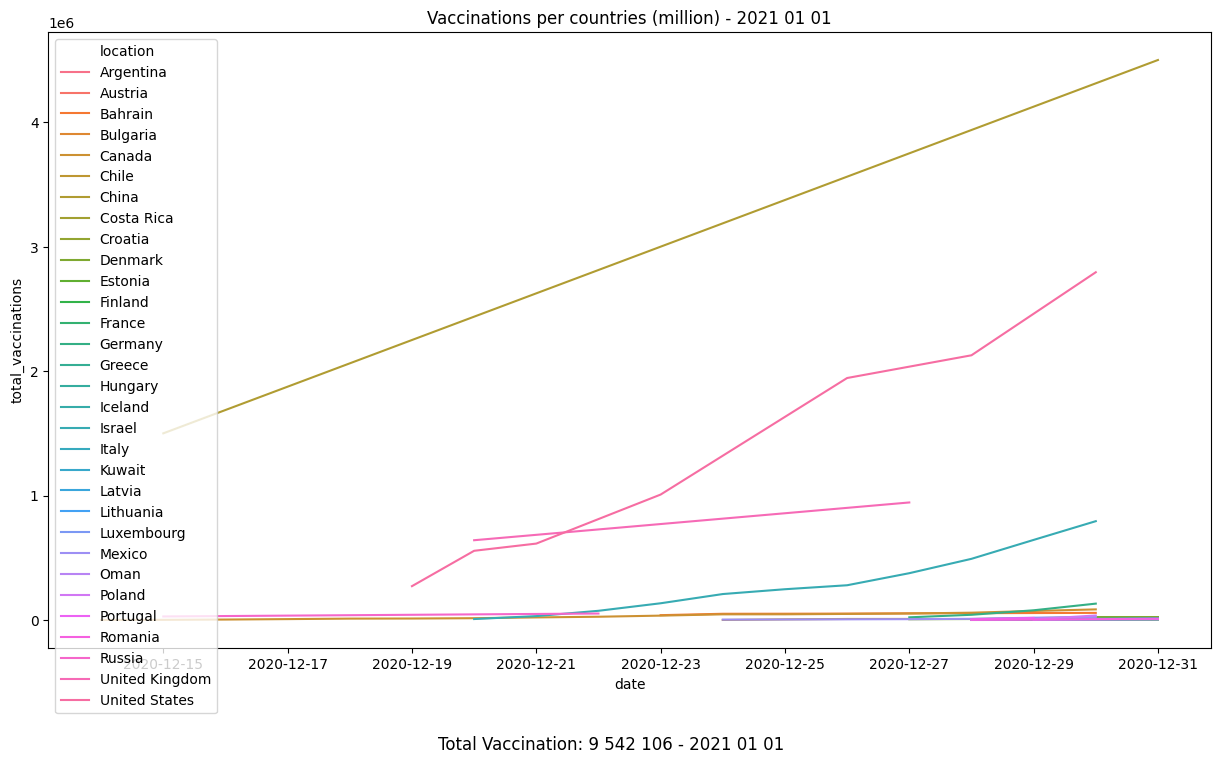

In [10]:
# plot all values = allCountriesFiltered
%matplotlib inline    
import matplotlib.pyplot as plt   
import seaborn as sns
plt.rcParams.update(plt.rcParamsDefault) 
plt.rcParams['figure.figsize'] = (15.0, 8.0)

sns.lineplot(data=allCountriesFiltered, x="date", y="total_vaccinations", hue="location" )
plt.title("Vaccinations per countries (million) - " + start_time.strftime('%Y %m %d'))
plt.suptitle("Total Vaccination: " + worldtotal_vaccinations_str  + " - " + start_time.strftime('%Y %m %d'),y=0)

plt.savefig('images/Corona_Line.png',bbox_inches='tight')  
plt.show() 


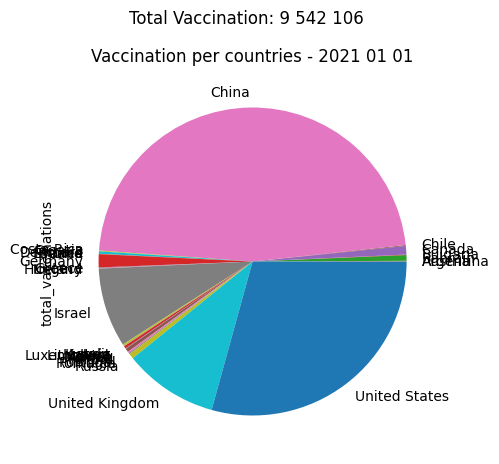

In [11]:
# Plot filtered
plt.rcParams.update(plt.rcParamsDefault) 
plt.rcParams['figure.figsize'] = (5, 5)
plotLatestCountries["total_vaccinations"].plot( y='location',kind = 'pie') 
plt.title("Vaccination per countries - " + start_time.strftime('%Y %m %d'))
plt.suptitle("Total Vaccination: " + worldtotal_vaccinations_str ,y=1)
plt.savefig('images/Corona_VaccinationperCountry.png')  
plt.show() 


In [12]:
plotLatestCountries.sort_values(by='total_vaccinations',ascending=False)

,total_vaccinations,vaccine,iso_code
location,,,
China,4500000,"CNBG, Sinovac",CHN
United States,2794588,"Moderna, Pfizer/BioNTech",USA
United Kingdom,944539,Pfizer/BioNTech,GBR
Israel,794200,Pfizer/BioNTech,ISR
Germany,131626,Pfizer/BioNTech,DEU
Canada,85279,Pfizer/BioNTech,CAN
Bahrain,57317,Sinopharm,BHR
Russia,52000,Sputnik V,RUS
Poland,36300,Pfizer/BioNTech,POL


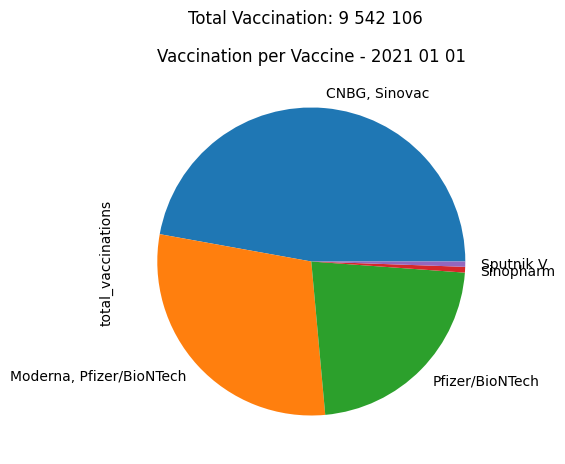

In [13]:
# Vaccine numbers
plotVaccine = plotLatestCountries.groupby('vaccine')['total_vaccinations'].sum()
plotVaccine.plot( kind = 'pie') 
plt.title("Vaccination per Vaccine - " + start_time.strftime('%Y %m %d'))
plt.suptitle("Total Vaccination: " + worldtotal_vaccinations_str ,y=1)
plt.savefig('images/Corona_VaccinationperVaccine.png')  
plt.show()

In [14]:
plotVaccine.sort_values(ascending=True)

vaccine
Sputnik V                     52700
Sinopharm                     57317
Pfizer/BioNTech             2137501
Moderna, Pfizer/BioNTech    2794588
CNBG, Sinovac               4500000
Name: total_vaccinations, dtype: int64

In [15]:
# Sweden have 10 000 doses....
#allCountries

In [16]:
end = datetime.now()
print("Ended: ", end) 
print('Time elapsed (hh:mm:ss.ms) {}'.format(datetime.now() - start_time))

Ended:  2021-01-01 00:18:11.098429
Time elapsed (hh:mm:ss.ms) 0:00:14.243314


### Whole dataset
see 
* [COVID-19 Data Processing Pipelines and datasets](https://github.com/covid19-data/covid19-data)

### Compare population
* using data from Wikidata


In [17]:
import sys,json
from SPARQLWrapper import SPARQLWrapper, JSON

endpoint_url = "https://query.wikidata.org/sparql"
 
# https://w.wiki/sYZ
queryWD = """SELECT DISTINCT ?cid  (SAMPLE(?continent) AS ?continent)  (SAMPLE(?memberEU) AS ?memberEU)  (SAMPLE(?democracy) AS ?democracy) ?country 
(REPLACE(STR(?cid), ".*Q", "Q") AS ?qid) ?population ?ISO3166_1 ?nominalGDPperCapita ?PPP_GDP_per_capita ?Human_Development_Index 
?G8 ?G20 ?IMF WHERE {
  ?cid wdt:P31 wd:Q3624078;
    wdt:P1082 ?population.
  OPTIONAL { ?cid wdt:P298 ?ISO3166_1. }
  OPTIONAL { ?cid wdt:P2132 ?nominalGDPperCapita. }
  OPTIONAL { ?cid wdt:P2299 ?PPP_GDP_per_capita. }
  OPTIONAL { ?cid wdt:P1081 ?Human_Development_Index. }
  BIND (exists{?cid wdt:P463 wd:Q458} AS ?memberEU)
  BIND (exists{?cid wdt:P463 wd:Q37143} AS ?G8)
  BIND (exists{?cid wdt:P463 wd:Q19771} AS ?G20)
  BIND (exists{?cid wdt:P463 wd:Q19771} AS ?IMF)
  BIND (exists{?cid wdt:P122/wdt:P279* wd:Q7174} AS ?democracy)
  {?cid wdt:P30 ?contid}
  OPTIONAL {
    ?contid rdfs:label ?continent.
    FILTER((LANG(?continent)) = "en")
    ?cid rdfs:label ?country.
    FILTER((LANG(?country)) = "en")
  }

SERVICE wikibase:label { bd:serviceParam wikibase:language "en". }
FILTER ( ?cid  not in ( wd:Q756617 ) ) #Danish Realm

}
GROUP BY ?population ?countryLabel ?country ?ISO3166_1 ?nominalGDPperCapita ?PPP_GDP_per_capita ?Human_Development_Index ?cid  
?G8 ?G20 ?IMF"""


def get_sparql_dataframe(endpoint_url, query):
    """
    Helper function to convert SPARQL results into a Pandas data frame.
    """
    user_agent = "salgo60/%s.%s" % (sys.version_info[0], sys.version_info[1])
 
    sparql = SPARQLWrapper(endpoint_url, agent=user_agent)
    sparql.setQuery(query)
    sparql.setReturnFormat(JSON)
    result = sparql.query()

    processed_results = json.load(result.response)
    cols = processed_results['head']['vars']

    out = []
    for row in processed_results['results']['bindings']:
        item = []
        for c in cols:
            item.append(row.get(c, {}).get('value'))
        out.append(item)

    return pd.DataFrame(out, columns=cols)

WDpopulation = get_sparql_dataframe(endpoint_url, queryWD)
WDpopulation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   cid                      194 non-null    object
 1   continent                194 non-null    object
 2   memberEU                 194 non-null    object
 3   democracy                194 non-null    object
 4   country                  194 non-null    object
 5   qid                      194 non-null    object
 6   population               194 non-null    object
 7   ISO3166_1                194 non-null    object
 8   nominalGDPperCapita      191 non-null    object
 9   PPP_GDP_per_capita       185 non-null    object
 10  Human_Development_Index  186 non-null    object
 11  G8                       194 non-null    object
 12  G20                      194 non-null    object
 13  IMF                      194 non-null    object
dtypes: object(14)
memory usage: 21.3+ KB


In [18]:
WDpopulation.sample(5)

,cid,continent,memberEU,democracy,country,qid,population,ISO3166_1,nominalGDPperCapita,PPP_GDP_per_capita,Human_Development_Index,G8,G20,IMF
65,http://www.wikidata.org/entity/Q881,Asia,false,false,Vietnam,Q881,94660000,VNM,2342,6790.211,0.694,false,false,false
133,http://www.wikidata.org/entity/Q1011,Africa,false,true,Cape Verde,Q1011,546388,CPV,3244,6912.638,0.654,false,false,false
96,http://www.wikidata.org/entity/Q184,Europe,false,true,Belarus,Q184,9408400,BLR,5733,18895.594,0.798,false,false,false
98,http://www.wikidata.org/entity/Q800,North America,false,false,Costa Rica,Q800,4905769,CRI,11677,17109.751,0.794,false,false,false
19,http://www.wikidata.org/entity/Q347,Europe,false,false,Liechtenstein,Q347,37922,LIE,164993,None,0.908,false,false,false


In [19]:
#All datat as Line Grapoh
#CountriesDataAll = pd.merge(allCountriesFiltered, WDpopulation,how='inner', left_on="iso_code", right_on="ISO3166_1" )   
#CountriesDataAll['population'] = CountriesData['population'].astype(int)

#CountriesDataAll["vaccinations_population_percent"] = CountriesDataAll["total_vaccinations"]/CountriesDataAll["population"] * 100


#CountriesDataAll[1:100]

In [20]:
plotLatestCountries

,total_vaccinations,vaccine,iso_code
location,,,
Argentina,700,Sputnik V,ARG
Austria,6000,Pfizer/BioNTech,AUT
Bahrain,57317,Sinopharm,BHR
Bulgaria,4608,Pfizer/BioNTech,BGR
Canada,85279,Pfizer/BioNTech,CAN
Chile,8648,Pfizer/BioNTech,CHL
China,4500000,"CNBG, Sinovac",CHN
Costa Rica,55,Pfizer/BioNTech,CRI
Croatia,7864,Pfizer/BioNTech,HRV


In [21]:
#plotCountriesPopulation = pd.merge(plotLatestCountries, reconciliationCountries,how='outer', left_index=True, right_index=True,indicator=True)   
CountriesData = pd.merge(plotLatestCountries, WDpopulation,how='inner', left_on="iso_code", right_on="ISO3166_1" ,indicator=True)   
CountriesData

,total_vaccinations,vaccine,iso_code,cid,continent,memberEU,democracy,country,qid,population,ISO3166_1,nominalGDPperCapita,PPP_GDP_per_capita,Human_Development_Index,G8,G20,IMF,_merge
0,700,Sputnik V,ARG,http://www.wikidata.org/entity/Q414,South America,false,true,Argentina,Q414,44938712,ARG,14398,20828.876,0.825,false,true,true,both
1,6000,Pfizer/BioNTech,AUT,http://www.wikidata.org/entity/Q40,Europe,true,true,Austria,Q40,8809212,AUT,44920,53879.298,0.885,false,false,false,both
2,57317,Sinopharm,BHR,http://www.wikidata.org/entity/Q398,Asia,false,false,Bahrain,Q398,1492584,BHR,23739,47708.055,0.824,false,false,false,both
3,4608,Pfizer/BioNTech,BGR,http://www.wikidata.org/entity/Q219,Europe,true,false,Bulgaria,Q219,7000039,BGR,8228,20948.097,0.782,false,false,false,both
4,85279,Pfizer/BioNTech,CAN,http://www.wikidata.org/entity/Q16,North America,false,false,Canada,Q16,37894799,CAN,44870,46509.717,0.926,true,true,true,both
5,8648,Pfizer/BioNTech,CHL,http://www.wikidata.org/entity/Q298,South America,false,true,Chile,Q298,18054726,CHL,15346,24747.307,0.832,false,false,false,both
6,4500000,"CNBG, Sinovac",CHN,http://www.wikidata.org/entity/Q148,Asia,false,true,People's Republic of China,Q148,1409517397,CHN,8826,16842.408,0.752,false,true,true,both
7,55,Pfizer/BioNTech,CRI,http://www.wikidata.org/entity/Q800,North America,false,false,Costa Rica,Q800,4905769,CRI,11677,17109.751,0.794,false,false,false,both
8,7864,Pfizer/BioNTech,HRV,http://www.wikidata.org/entity/Q224,Europe,true,true,Croatia,Q224,4105493,HRV,13386,26295.512,0.831,false,false,false,both
9,23895,Pfizer/BioNTech,DNK,http://www.wikidata.org/entity/Q35,Europe,true,false,Denmark,Q35,5827463,DNK,57218,54356.448,0.929,false,false,false,both


In [22]:
#del CountriesData['country']
#del CountriesData['qid']
#del CountriesData['_merge']

CountriesData['population'] = CountriesData['population'].astype(int)
CountriesData['nominalGDPperCapita'] = CountriesData['nominalGDPperCapita'].astype(float)
CountriesData['PPP_GDP_per_capita'] = CountriesData['PPP_GDP_per_capita'].astype(float)
CountriesData['Human_Development_Index'] = CountriesData['Human_Development_Index'].astype(float)
CountriesData["memberEU"].replace({"true": "1", "false": "0"}, inplace=True)
CountriesData['memberEU'] = CountriesData['memberEU'].astype(int)
CountriesData["democracy"].replace({"true": "1", "false": "0"}, inplace=True)
CountriesData["democracy"] = CountriesData['democracy'].astype(int)
# G8 G20 IMF
CountriesData["G8"].replace({"true": "1", "false": "0"}, inplace=True)
CountriesData['G8'] = CountriesData['G8'].astype(int)
CountriesData["G20"].replace({"true": "1", "false": "0"}, inplace=True)
CountriesData['G20'] = CountriesData['G20'].astype(int)
CountriesData["IMF"].replace({"true": "1", "false": "0"}, inplace=True)
CountriesData['IMF'] = CountriesData['IMF'].astype(int)

#"Correct United States of America
CountriesData["continent"].replace({"Oceania": "North America"}, inplace=True)
CountriesData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31 entries, 0 to 30
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   total_vaccinations       31 non-null     int64   
 1   vaccine                  31 non-null     object  
 2   iso_code                 31 non-null     object  
 3   cid                      31 non-null     object  
 4   continent                31 non-null     object  
 5   memberEU                 31 non-null     int64   
 6   democracy                31 non-null     int64   
 7   country                  31 non-null     object  
 8   qid                      31 non-null     object  
 9   population               31 non-null     int64   
 10  ISO3166_1                31 non-null     object  
 11  nominalGDPperCapita      31 non-null     float64 
 12  PPP_GDP_per_capita       31 non-null     float64 
 13  Human_Development_Index  31 non-null     float64 
 14  G8          

In [23]:
#CountriesData

In [24]:
CountriesData['Country'] = CountriesData.index

In [25]:
CountriesData["vaccinations_population_percent"] = CountriesData["total_vaccinations"]/CountriesData["population"] * 100

correlations = CountriesData.corr()  
correlations["total_vaccinations"]

total_vaccinations                 1.000000
memberEU                          -0.305028
democracy                          0.161585
population                         0.911579
nominalGDPperCapita                0.019985
PPP_GDP_per_capita                -0.070130
Human_Development_Index           -0.090056
G8                                 0.155377
G20                                0.406927
IMF                                0.406927
Country                            0.060307
vaccinations_population_percent    0.138907
Name: total_vaccinations, dtype: float64

In [26]:
correlations["vaccinations_population_percent"]

total_vaccinations                 0.138907
memberEU                          -0.304931
democracy                          0.009707
population                        -0.045820
nominalGDPperCapita                0.167517
PPP_GDP_per_capita                 0.088580
Human_Development_Index            0.223691
G8                                -0.070934
G20                               -0.125192
IMF                               -0.125192
Country                           -0.008087
vaccinations_population_percent    1.000000
Name: vaccinations_population_percent, dtype: float64

In [27]:
# see https://medium.com/@szabo.bibor/how-to-create-a-seaborn-correlation-heatmap-in-python-834c0686b88e
#plt.rcParams['figure.figsize'] = (8.0, 8.0)
#heatmap = sns.heatmap(correlations, vmin=-1, vmax=1, annot=True)
#heatmap.set_title('Corona vaccinations Correlation Heatmap', fontdict={'fontsize':12}, pad=12);


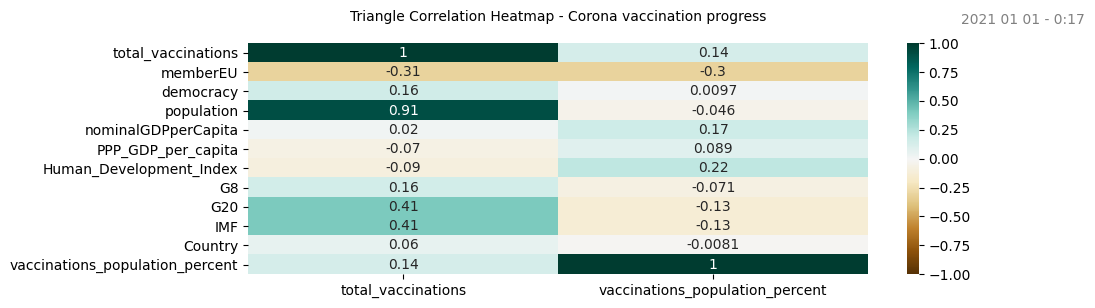

In [28]:
import numpy as np
plt.figure(figsize=(10, 3))
#np.triu(np.ones_like(correlations["total_vaccinations","vaccinations_population_percent"]))
#mask = np.triu(np.ones_like(correlations, dtype=np.bool))
heatmap = sns.heatmap(correlations[{"total_vaccinations","vaccinations_population_percent"}],vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap - Corona vaccination progress', fontdict={'fontsize':10},y=0.9, pad=16);
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M'), fontsize=10,color = 'gray',x=0.9)
plt.savefig('images/Correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show() 


In [29]:
CountriesData = CountriesData.sort_values(by=['vaccinations_population_percent'],ascending=False)
CountriesData[{"total_vaccinations","population","vaccinations_population_percent","continent",
               "memberEU","G8","G20","IMF","country"}]

,population,vaccinations_population_percent,memberEU,continent,total_vaccinations,G8,IMF,G20,country
17,9093000,8.734191,0,Asia,794200,0,0,0,Israel
2,1492584,3.840119,0,Asia,57317,0,0,0,Bahrain
29,66022273,1.430637,1,Europe,944539,1,1,1,United Kingdom
16,357050,1.365355,0,Europe,4875,0,0,0,Iceland
30,328239523,0.851387,0,North America,2794588,1,1,1,United States of America
9,5827463,0.410041,1,Europe,23895,0,0,0,Denmark
6,1409517397,0.319258,0,Asia,4500000,0,1,1,People's Republic of China
4,37894799,0.225041,0,North America,85279,1,1,1,Canada
22,626108,0.191660,1,Europe,1200,0,0,0,Luxembourg
8,4105493,0.191548,1,Europe,7864,0,0,0,Croatia


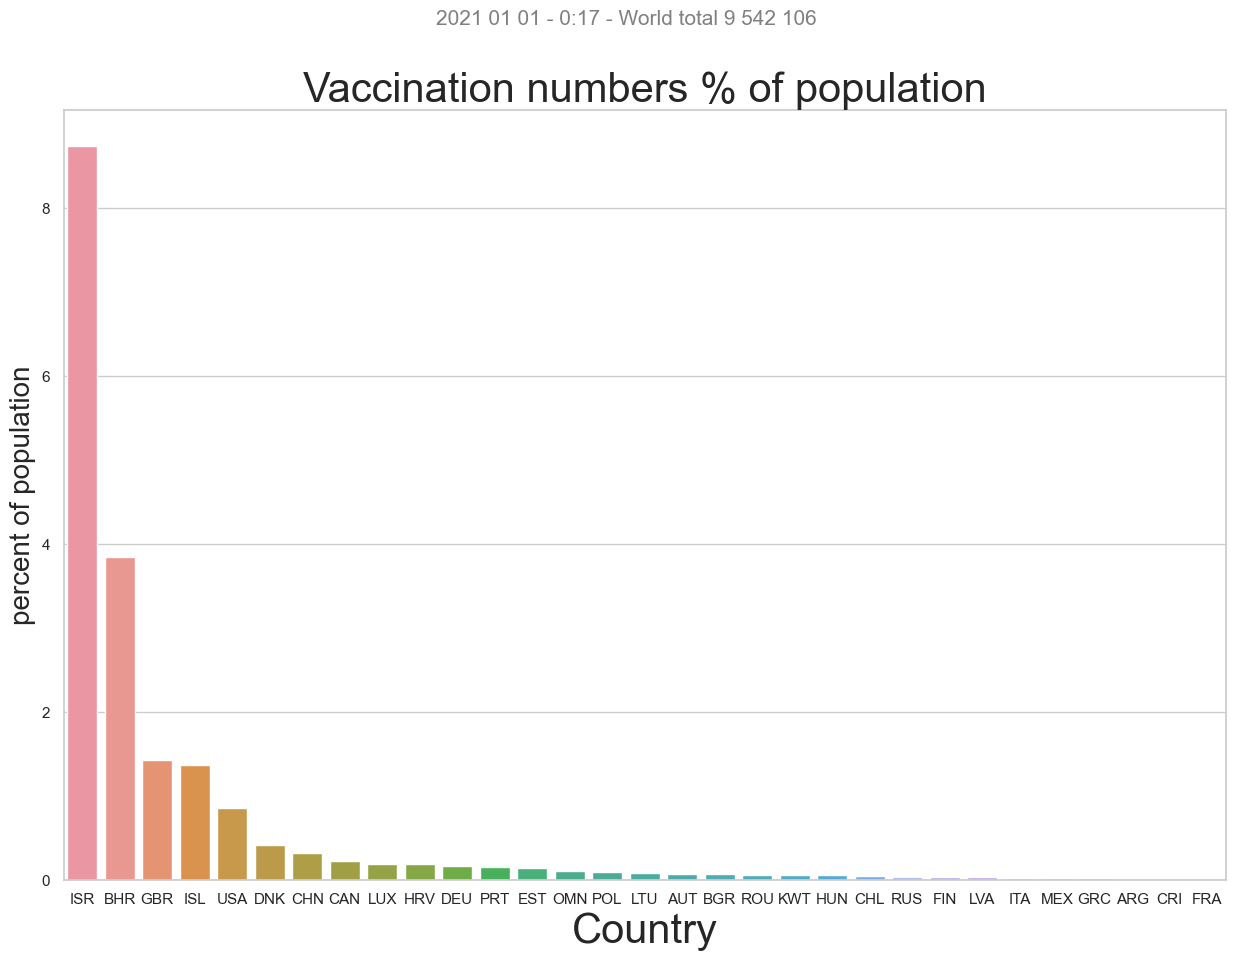

In [30]:
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.set(style="whitegrid", palette="rainbow") 
sns.barplot( x = "ISO3166_1",y = "vaccinations_population_percent", data=CountriesData). \
            set_title("Vaccination numbers % of population", \
                      fontsize=30)
plt.ylabel("percent of population",fontsize=20)
plt.xlabel("Country",fontsize=30)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - World total ' + worldtotal_vaccinations_str), fontsize=15,color = 'gray')
plt.savefig("images/Corona_VaccinationperCountryPopulation_sns_2.png",bbox_inches="tight")
plt.show() 

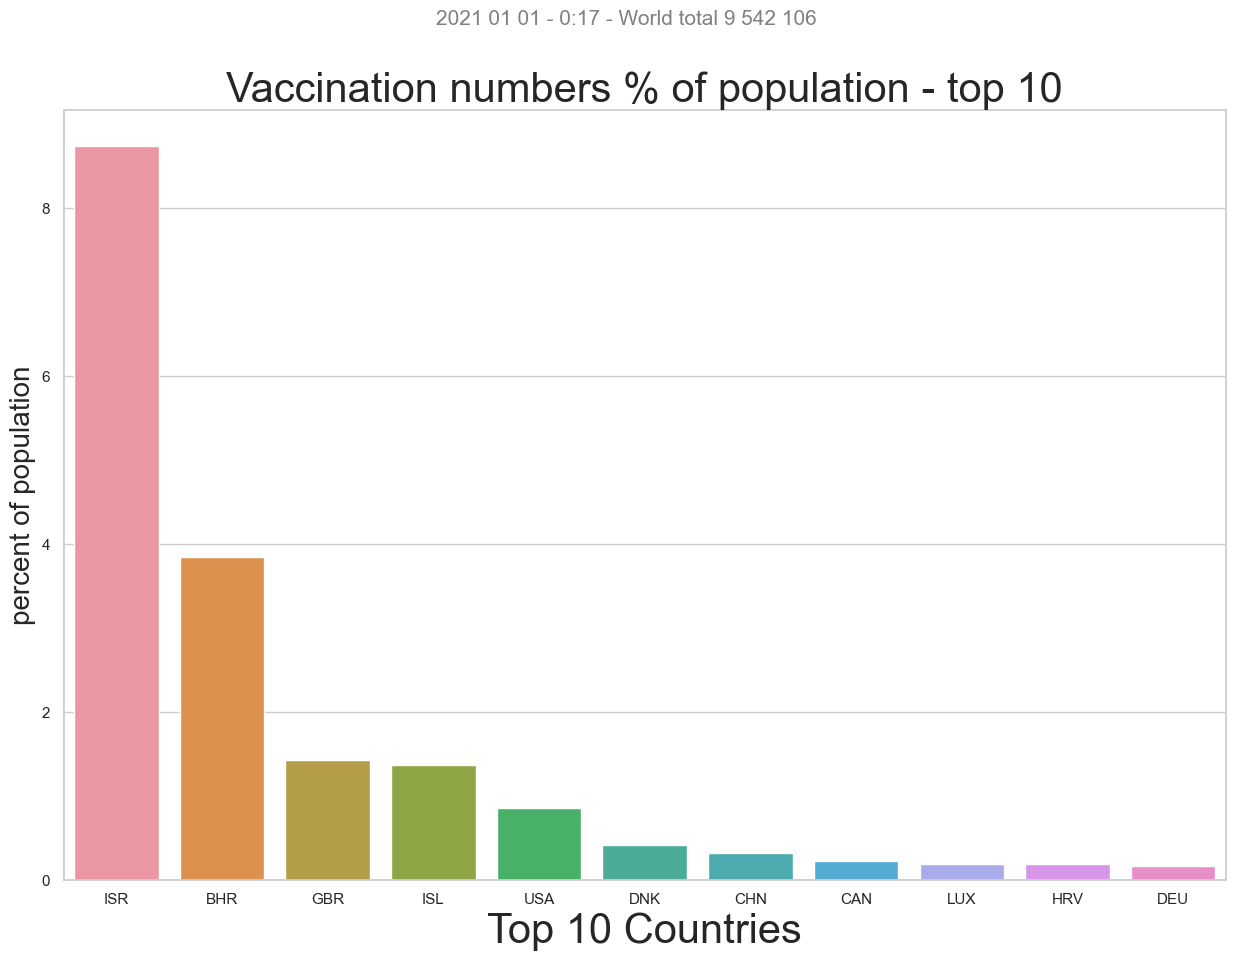

In [31]:
#Top 10 
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.set(style="whitegrid", palette="rainbow") 
sns.barplot( x = "ISO3166_1",y = "vaccinations_population_percent", data=CountriesData[0:11]). \
            set_title("Vaccination numbers % of population - top 10", \
                      fontsize=30)
plt.ylabel("percent of population",fontsize=20)
plt.xlabel("Top 10 Countries",fontsize=30)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - World total ' + worldtotal_vaccinations_str ), fontsize=15,color = 'gray')

plt.savefig("images/Corona_VaccinationperCountryPopulation_sns_1_10.png",bbox_inches="tight")
plt.show() 

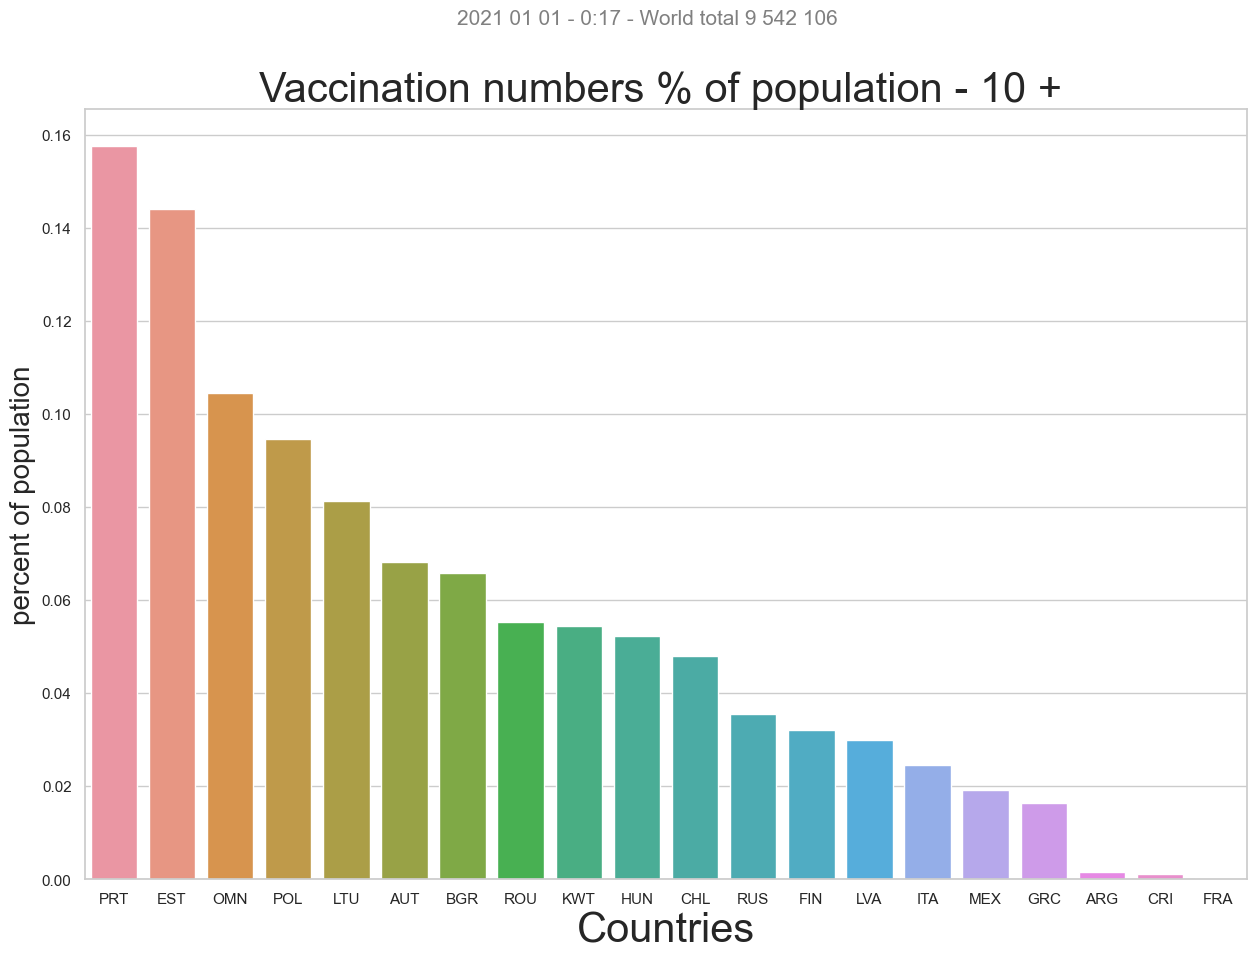

In [32]:
# 10-
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.set(style="whitegrid", palette="rainbow") 
sns.barplot( x = "ISO3166_1",y = "vaccinations_population_percent", data=CountriesData[11:]). \
            set_title("Vaccination numbers % of population - 10 + ", \
                      fontsize=30)
plt.ylabel("percent of population",fontsize=20)
plt.xlabel("Countries",fontsize=30)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - World total ' + worldtotal_vaccinations_str ), fontsize=15,color = 'gray')
plt.savefig("images/Corona_VaccinationperCountryPopulation_sns_10_.png",bbox_inches="tight")
plt.show() 

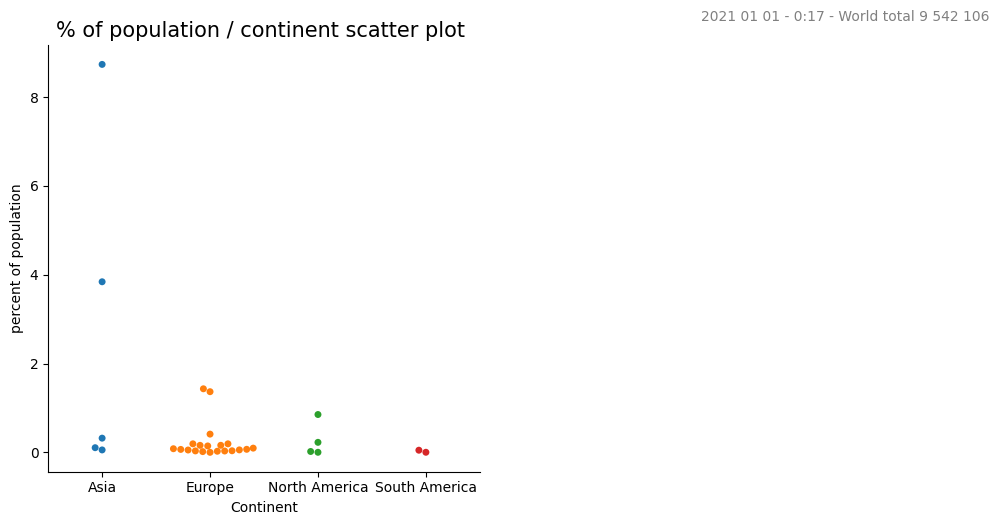

In [33]:
#https://seaborn.pydata.org/tutorial/categorical.html
plt.rcParams.update(plt.rcParamsDefault) 
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.color_palette("magma")
sns.catplot(x="continent", y="vaccinations_population_percent", data=CountriesData,kind="swarm",legend='brief')
plt.title("% of population / continent scatter plot " , fontsize=15, y=0.9 )
plt.ylabel("percent of population",fontsize=10)
plt.xlabel("Continent",fontsize=10)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - World total ' + worldtotal_vaccinations_str ), x=1.7,y=1.04, fontsize=10,color = 'gray')

plt.savefig("images/Corona_VaccinationperCountryPopulation_Categorical_scatterplot.png",bbox_inches="tight")
plt.show() 

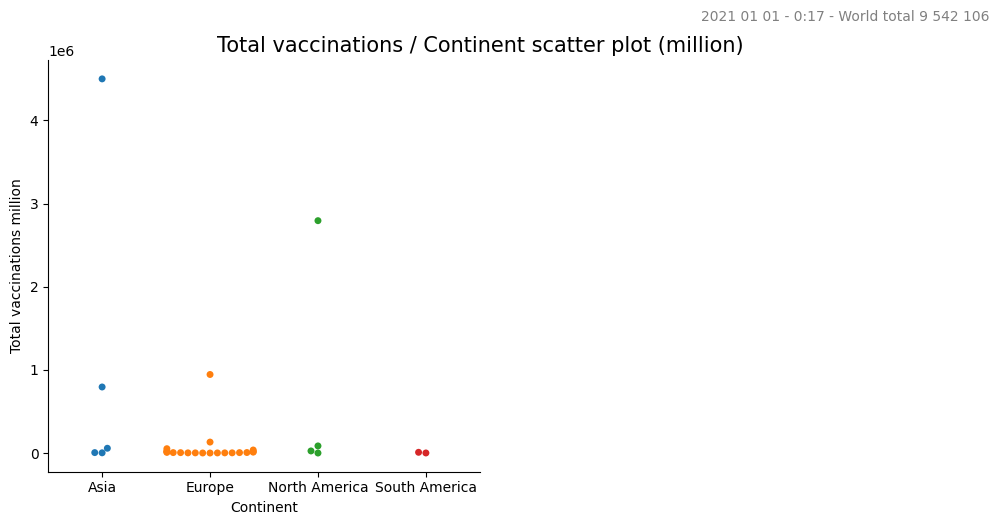

In [34]:
plt.rcParams.update(plt.rcParamsDefault) 
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.color_palette("magma")
sns.catplot(x="continent", y="total_vaccinations", data=CountriesData,kind="swarm",legend='brief')
plt.title("Total vaccinations / Continent scatter plot (million)" , fontsize=15, x=1,y=1.1 )
plt.ylabel("Total vaccinations million",fontsize=10)
plt.xlabel("Continent",fontsize=10)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - World total ' + worldtotal_vaccinations_str ), x=1.7,y=1.04, fontsize=10,color = 'gray')

plt.savefig("images/Corona_VaccinationperCountryTotal_Categorical_scatterplot.png",bbox_inches="tight")
plt.show() 

In [35]:
CountriesData["Member EU"] = CountriesData["memberEU"]
CountriesData["Member EU"] = CountriesData["Member EU"].astype(str)
CountriesData["Member EU"].replace({"1": "Member in EU", "0": "non Member"}, inplace=True)

#CountriesData

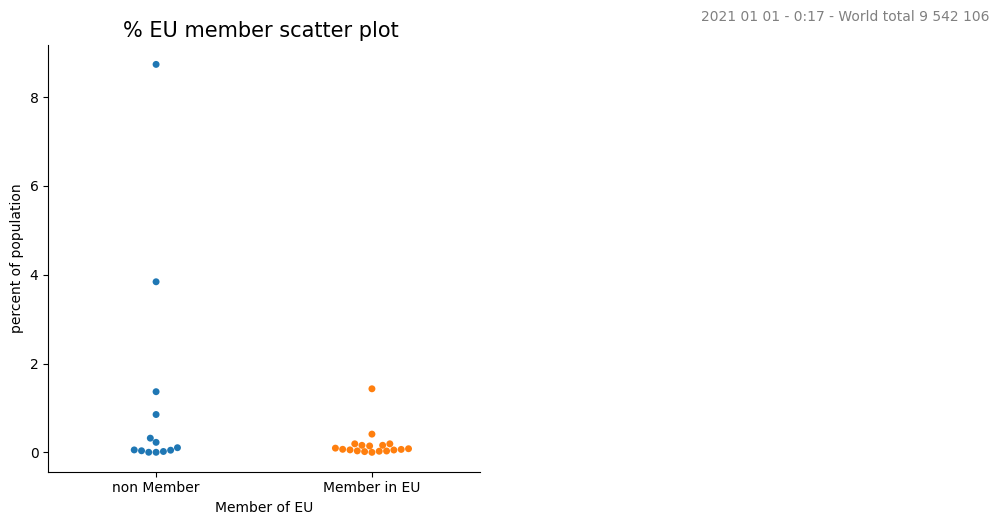

In [36]:

plt.rcParams.update(plt.rcParamsDefault) 
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.color_palette("magma")
sns.catplot(x="Member EU", y="vaccinations_population_percent", data=CountriesData,kind="swarm",legend='brief')
plt.title("% EU member scatter plot " , fontsize=15, y=0.9 )
plt.ylabel("percent of population",fontsize=10)
plt.xlabel("Member of EU",fontsize=10)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - World total ' + worldtotal_vaccinations_str), x=1.7,y=1.04, fontsize=10,color = 'gray')

plt.savefig("images/Corona_VaccinationperCountryPopulation_EUCategorical_scatterplot.png",bbox_inches="tight")
plt.show() 

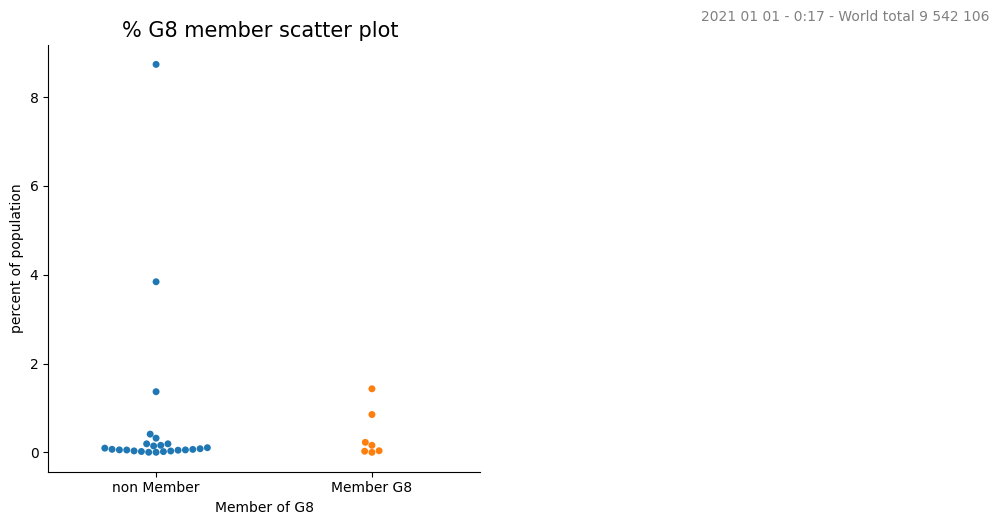

In [37]:
CountriesData["Member G8"] = CountriesData["G8"]
CountriesData["Member G8"] = CountriesData["G8"].astype(str)
CountriesData["Member G8"].replace({"1": "Member G8", "0": "non Member"}, inplace=True)
plt.rcParams.update(plt.rcParamsDefault) 
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.color_palette("magma")
sns.catplot(x="Member G8", y="vaccinations_population_percent", data=CountriesData,kind="swarm",legend='brief')
plt.title("% G8 member scatter plot " , fontsize=15, y=0.9 )
plt.ylabel("percent of population",fontsize=10)
plt.xlabel("Member of G8",fontsize=10)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - World total '  + worldtotal_vaccinations_str), x=1.7,y=1.04, fontsize=10,color = 'gray')

plt.savefig("images/Corona_VaccinationperCountryPopulation_G8_Categorical_scatterplot.png",bbox_inches="tight")
plt.show() 

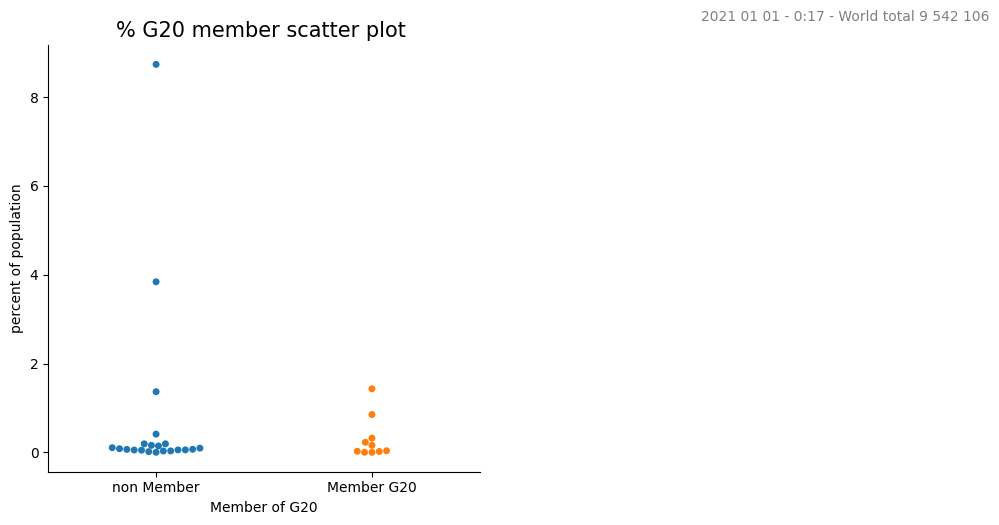

In [38]:
CountriesData["Member G20"] = CountriesData["G20"]
CountriesData["Member G20"] = CountriesData["G20"].astype(str)
CountriesData["Member G20"].replace({"1": "Member G20", "0": "non Member"}, inplace=True)
plt.rcParams.update(plt.rcParamsDefault) 
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.color_palette("magma")
sns.catplot(x="Member G20", y="vaccinations_population_percent", data=CountriesData,kind="swarm",legend='brief')
plt.title("% G20 member scatter plot " , fontsize=15, y=0.9 )
plt.ylabel("percent of population",fontsize=10)
plt.xlabel("Member of G20",fontsize=10)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - World total '  + worldtotal_vaccinations_str), x=1.7,y=1.04, fontsize=10,color = 'gray')

plt.savefig("images/Corona_VaccinationperCountryPopulation_G20_Categorical_scatterplot.png",bbox_inches="tight")
plt.show() 

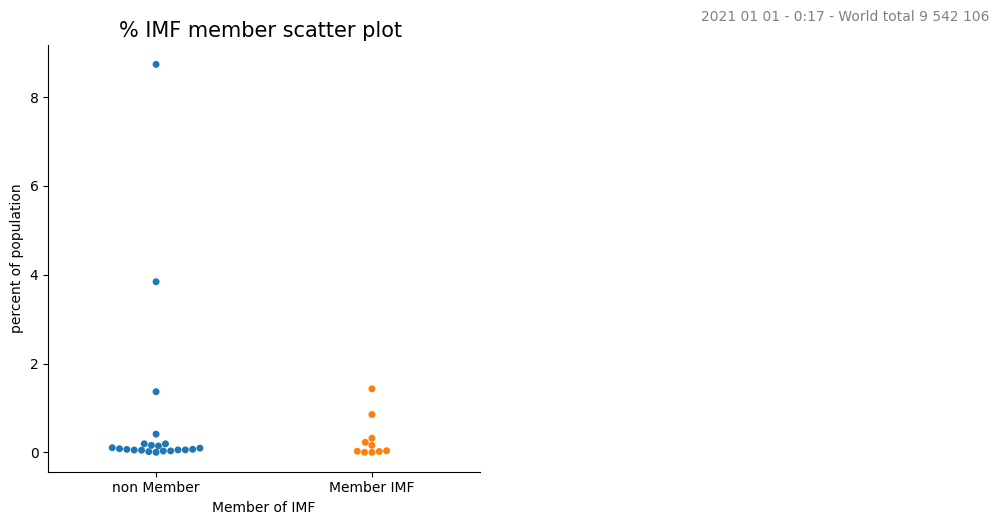

In [39]:
CountriesData["Member IMF"] = CountriesData["IMF"]
CountriesData["Member IMF"] = CountriesData["IMF"].astype(str)
CountriesData["Member IMF"].replace({"1": "Member IMF", "0": "non Member"}, inplace=True)
plt.rcParams.update(plt.rcParamsDefault) 
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.color_palette("magma")
sns.catplot(x="Member IMF", y="vaccinations_population_percent", data=CountriesData,kind="swarm",legend='brief')
plt.title("% IMF member scatter plot " , fontsize=15, y=0.9 )
plt.ylabel("percent of population",fontsize=10)
plt.xlabel("Member of IMF",fontsize=10)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - World total ' + worldtotal_vaccinations_str), x=1.7,y=1.04, fontsize=10,color = 'gray')

plt.savefig("images/Corona_VaccinationperCountryPopulation_IMF_Categorical_scatterplot.png",bbox_inches="tight")
plt.show() 

In [40]:
CountriesDataEurope = CountriesData[CountriesData["continent"] == "Europe"]

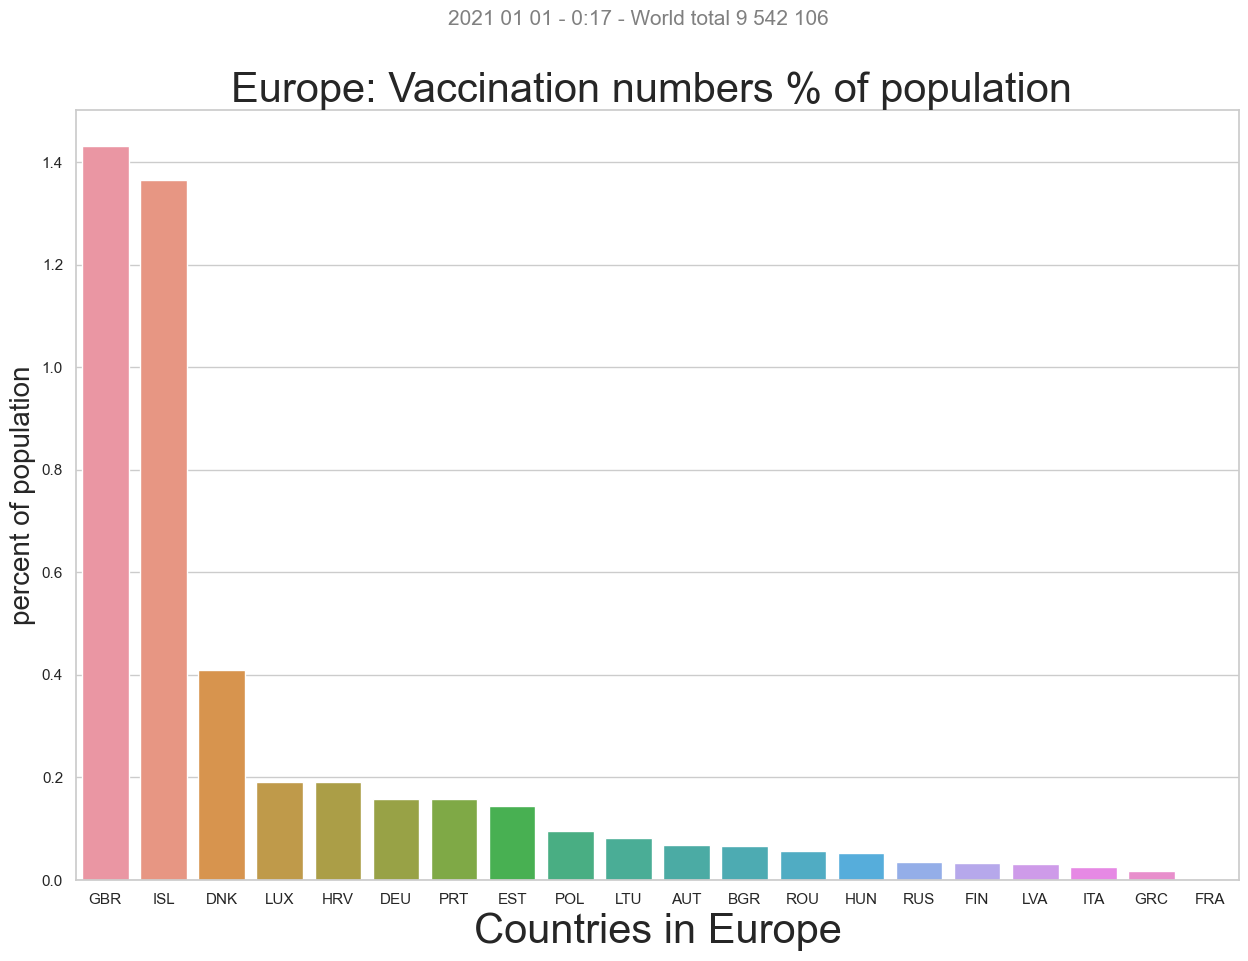

In [41]:
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.set(style="whitegrid", palette="rainbow") 
sns.barplot( x = "ISO3166_1",y = "vaccinations_population_percent", data=CountriesDataEurope). \
            set_title("Europe: Vaccination numbers % of population ", \
                      fontsize=30)
plt.ylabel("percent of population",fontsize=20)
plt.xlabel("Countries in Europe",fontsize=30)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - World total ' + worldtotal_vaccinations_str), fontsize=15,color = 'gray')
plt.savefig("images/Corona_EuropeVaccinationperCountryPopulation.png",bbox_inches="tight")
plt.show() 

In [42]:
#CountriesDataEurope

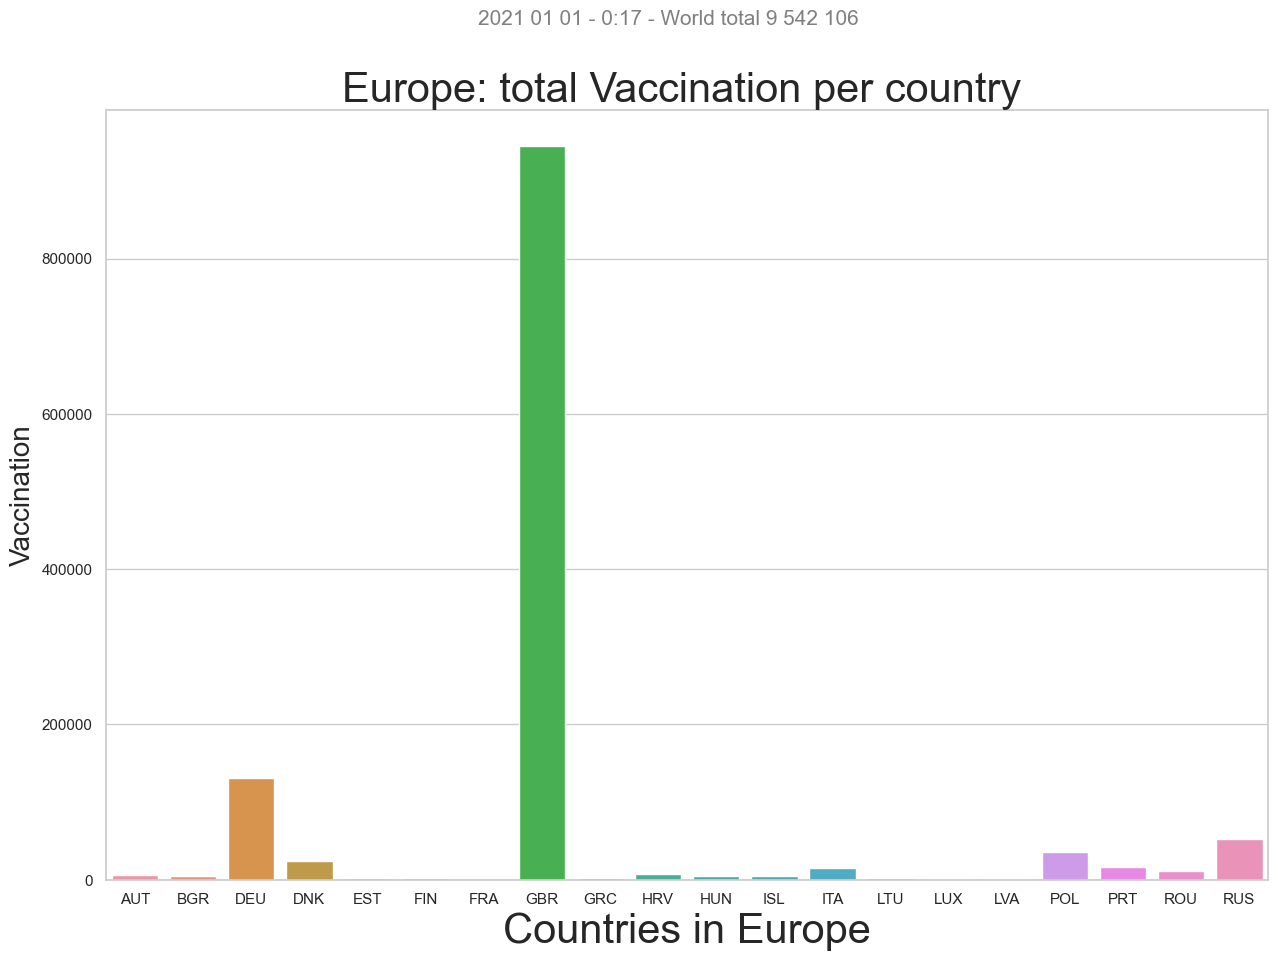

In [43]:
CountriesDataEurope = CountriesDataEurope.sort_values(by=['iso_code'],ascending=True)
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.set(style="whitegrid", palette="rainbow") 
sns.barplot( x = "ISO3166_1",y = "total_vaccinations", data=CountriesDataEurope). \
            set_title("Europe: total Vaccination per country ", \
                      fontsize=30)
plt.ylabel("Vaccination",fontsize=20)
plt.xlabel("Countries in Europe",fontsize=30)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - World total ' + worldtotal_vaccinations_str), fontsize=15,color = 'gray')
plt.savefig("images/Corona_EuropeVaccinationperCountry.png",bbox_inches="tight")
plt.show() 

In [44]:
#WDpopulationEurope.info()

In [45]:
#All countries Europe also no reporting
WDpopulationEurope = WDpopulation[WDpopulation["continent"] == "Europe"]
 
#CountriesDataEuropeAll = CountriesDataEurope
CountriesDataEuropeAll = pd.merge(WDpopulationEurope,CountriesDataEurope,how='outer',on="ISO3166_1") \
        [{"memberEU_x","country_x","ISO3166_1","total_vaccinations","vaccinations_population_percent"}]

CountriesDataEuropeAll['total_vaccinations'] = CountriesDataEuropeAll['total_vaccinations'].fillna(0)
CountriesDataEuropeAll['vaccinations_population_percent'] = CountriesDataEuropeAll['vaccinations_population_percent'].fillna(0)
CountriesDataEuropeAll = CountriesDataEuropeAll.sort_values(by=['ISO3166_1'],ascending=True)
#CountriesDataEuropeAll["Member EU"] = CountriesDataEuropeAll["Member EU"].fillna("non Member")
CountriesDataEuropeAll["memberEU_x"].replace({"true": "Member in EU", "false": "non Member"}, inplace=True)
CountriesDataEuropeAll["memberEU_x"].replace({"true": "Member in EU", "false": "non Member"}, inplace=True)
#CountriesDataEuropeAll.rename(columns = {'memberEU_x': 'memberEU'}, inplace = False)
# name change 
CountriesDataEuropeAll
#CountriesDataEurope
#WDpopulationEurope 
#CountriesDataEurope

,ISO3166_1,vaccinations_population_percent,country_x,total_vaccinations,memberEU_x
40,ALB,0.000000,Albania,0.0,non Member
3,AND,0.000000,Andorra,0.0,non Member
14,ARM,0.000000,Armenia,0.0,non Member
11,AUT,0.068111,Austria,6000.0,Member in EU
29,AZE,0.000000,Azerbaijan,0.0,non Member
1,BEL,0.000000,Belgium,0.0,Member in EU
47,BGR,0.065828,Bulgaria,4608.0,Member in EU
17,BIH,0.000000,Bosnia and Herzegovina,0.0,non Member
19,BLR,0.000000,Belarus,0.0,non Member
5,CHE,0.000000,Switzerland,0.0,non Member


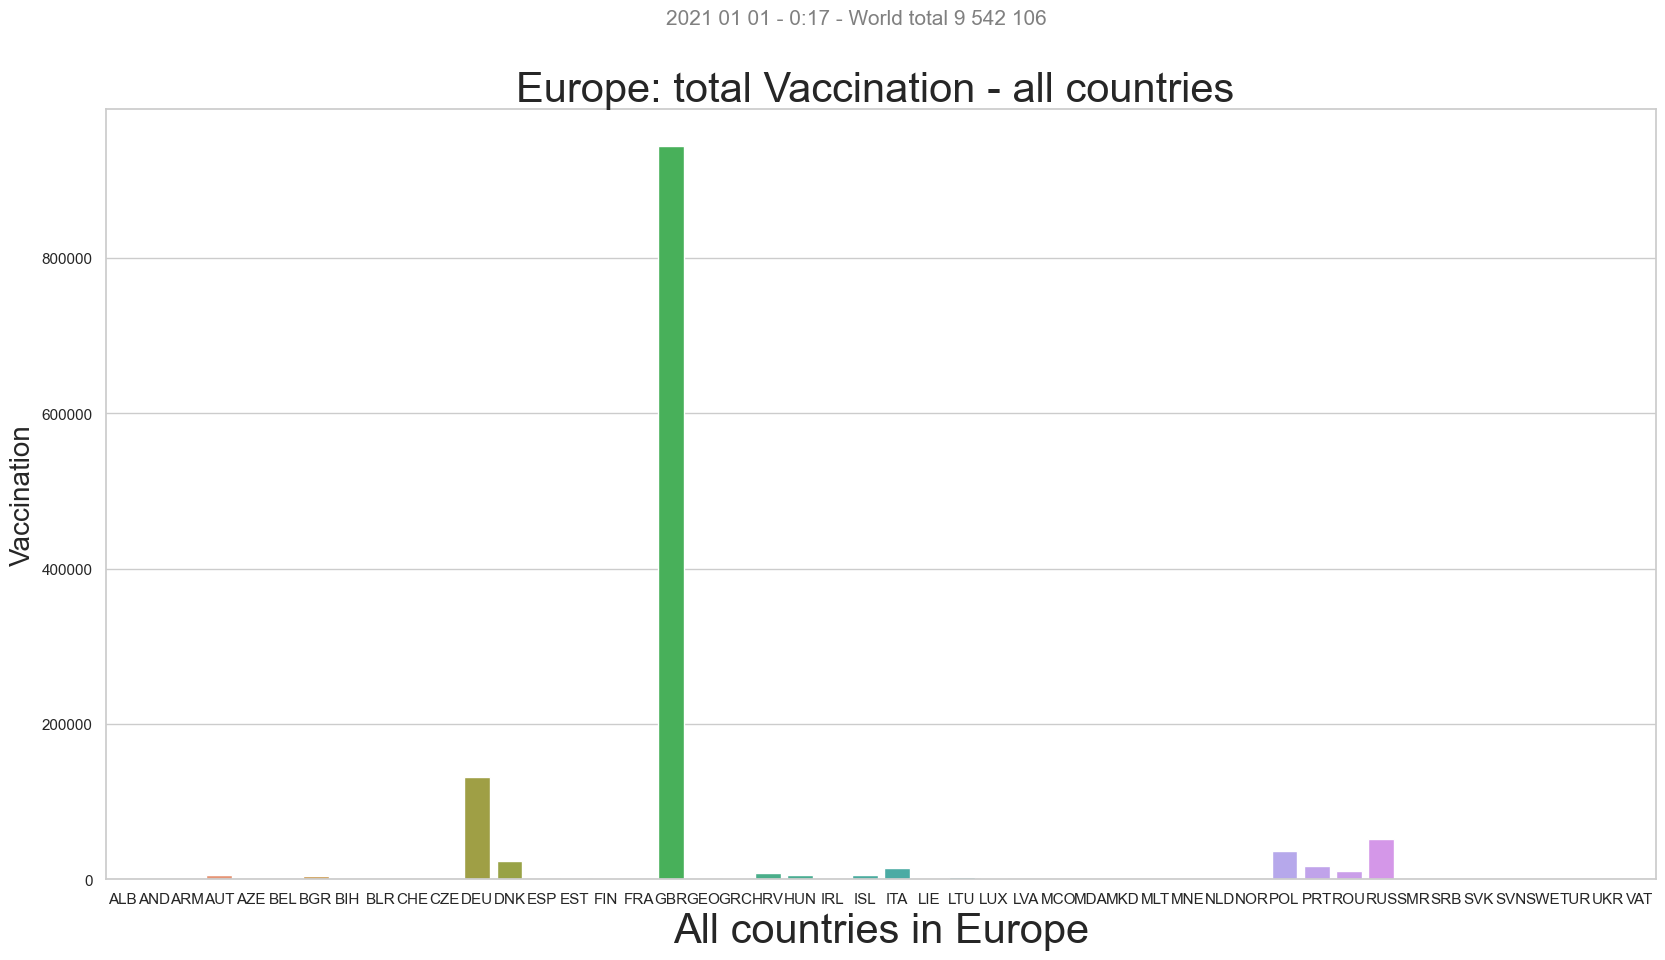

In [46]:
plt.rcParams['figure.figsize'] = (20.0, 10.0)
sns.set(style="whitegrid", palette="rainbow") 
sns.barplot( x = "ISO3166_1",y = "total_vaccinations", data=CountriesDataEuropeAll). \
            set_title("Europe: total Vaccination - all countries ", \
                      fontsize=30)
plt.ylabel("Vaccination",fontsize=20)
plt.xlabel("All countries in Europe",fontsize=30)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - World total ' + worldtotal_vaccinations_str), fontsize=15,color = 'gray')
plt.savefig("images/Corona_EuropeAllVaccinationperCountry.png",bbox_inches="tight")
plt.show() 

In [47]:
CountriesDataEuropeAll

,ISO3166_1,vaccinations_population_percent,country_x,total_vaccinations,memberEU_x
40,ALB,0.000000,Albania,0.0,non Member
3,AND,0.000000,Andorra,0.0,non Member
14,ARM,0.000000,Armenia,0.0,non Member
11,AUT,0.068111,Austria,6000.0,Member in EU
29,AZE,0.000000,Azerbaijan,0.0,non Member
1,BEL,0.000000,Belgium,0.0,Member in EU
47,BGR,0.065828,Bulgaria,4608.0,Member in EU
17,BIH,0.000000,Bosnia and Herzegovina,0.0,non Member
19,BLR,0.000000,Belarus,0.0,non Member
5,CHE,0.000000,Switzerland,0.0,non Member


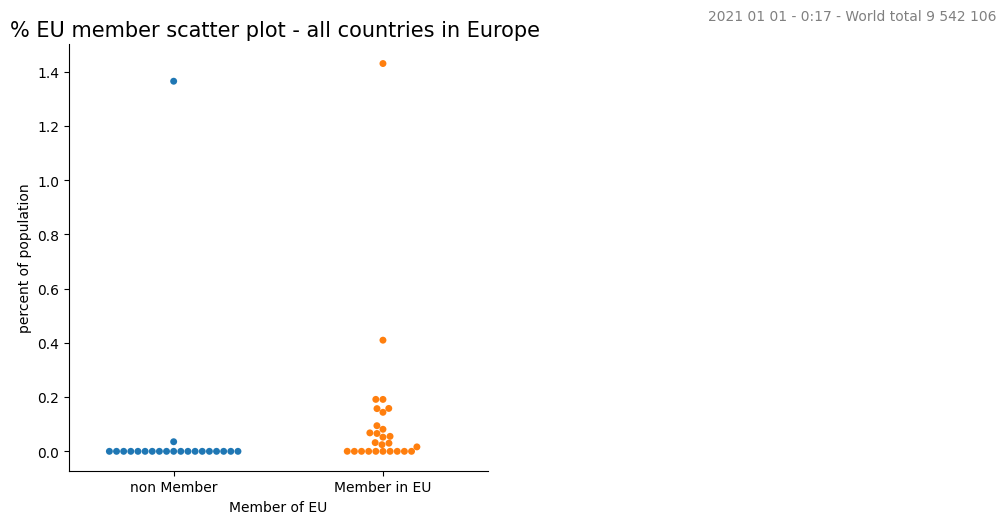

In [48]:
plt.rcParams.update(plt.rcParamsDefault) 
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.color_palette("magma")
sns.catplot(x="memberEU_x", y="vaccinations_population_percent", data=CountriesDataEuropeAll,kind="swarm",legend='brief')
plt.title("% EU member scatter plot - all countries in Europe " , fontsize=15, y=0.9 )
plt.ylabel("percent of population",fontsize=10)
plt.xlabel("Member of EU",fontsize=10)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - World total ' + worldtotal_vaccinations_str), x=1.7,y=1.04, fontsize=10,color = 'gray')

plt.savefig("images/Corona_VaccinationperPopulation_AllEurope_scatterplot.png",bbox_inches="tight")
plt.show() 

In [49]:
end = datetime.now()
print("Ended:a ", end) 
print('Time elapsed (hh:mm:ss.ms) {}'.format(datetime.now() - start_time))

Ended:a  2021-01-01 00:18:36.490120
Time elapsed (hh:mm:ss.ms) 0:00:39.634939
